### Подключение библиотек и загрузка данных

In [38]:
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv("diabetes_clean.csv")
print(diabetes_df.head(5))

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


### Исключение аномальных значений

In [39]:
diabetes_df = diabetes_df[diabetes_df["bmi"]>0]
diabetes_df = diabetes_df[diabetes_df["glucose"]>0]
diabetes_df = diabetes_df[diabetes_df["insulin"]>0]

### Разбивка данных на целевую переменнуюи массив признаков

In [40]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"]

### Предсказание по одной переменной (BMI)

In [41]:
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)
print(X_bmi)

(392,) (392,)
[28.1 43.1 31.  30.5 30.1 25.8 45.8 43.3 34.6 39.3 36.6 31.1 23.2 22.2
 31.6 24.8 24.  37.1 34.  45.4 19.4 24.2 24.4 33.7 34.7 37.7 46.8 41.5
 25.4 19.6 28.9 32.9 28.6 35.1 29.3 32.4 38.5 37.1 32.  46.7 24.7 33.9
 20.4 28.7 49.7 26.6 28.7 29.5 34.3 37.4 33.3 34.  31.2 30.5 23.2 53.2
 33.6 55.  42.9 33.3 34.5 29.7 34.5 21.1 33.8 30.8 28.7 36.9 32.5 32.8
 30.5 37.4 34.3 40.6 24.6 25.2 29.  40.9 37.2 44.2 29.9 28.4 35.4 43.5
 29.7 32.7 67.1 34.9 30.1 32.  27.9 31.6 33.1 39.4 22.9 34.8 30.9 20.4
 37.7 37.5 33.2 42.6 34.2 41.8 35.8 30.  34.6 28.8 23.6 34.6 36.7 45.2
 46.2 25.4 29.7 35.9 33.1 27.1 38.2 52.3 35.4 24.4 27.6 25.9 33.3 30.9
 33.6 25.2 33.2 40.5 27.8 25.3 35.9 32.4 26.  38.7 45.6 20.8 36.1 36.9
 36.6 43.3 40.5 35.5 28.  30.7 36.6 31.6 35.8 39.7 25.5 24.8 30.5 32.9
 39.4 26.6 29.5 34.1 19.3 38.1 27.5 26.8 25.6 35.1 45.5 30.8 32.7 23.9
 47.9 34.2 25.9 25.9 38.5 28.7 21.8 27.2 33.3 35.3 36.5 31.2 34.9 34.
 27.5 32.8 38.4 35.8 34.9 36.2 39.2 25.2 37.2 43.4 30.8 25.4 25.

In [42]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)
print(X_bmi)

(392, 1)
[[28.1]
 [43.1]
 [31. ]
 [30.5]
 [30.1]
 [25.8]
 [45.8]
 [43.3]
 [34.6]
 [39.3]
 [36.6]
 [31.1]
 [23.2]
 [22.2]
 [31.6]
 [24.8]
 [24. ]
 [37.1]
 [34. ]
 [45.4]
 [19.4]
 [24.2]
 [24.4]
 [33.7]
 [34.7]
 [37.7]
 [46.8]
 [41.5]
 [25.4]
 [19.6]
 [28.9]
 [32.9]
 [28.6]
 [35.1]
 [29.3]
 [32.4]
 [38.5]
 [37.1]
 [32. ]
 [46.7]
 [24.7]
 [33.9]
 [20.4]
 [28.7]
 [49.7]
 [26.6]
 [28.7]
 [29.5]
 [34.3]
 [37.4]
 [33.3]
 [34. ]
 [31.2]
 [30.5]
 [23.2]
 [53.2]
 [33.6]
 [55. ]
 [42.9]
 [33.3]
 [34.5]
 [29.7]
 [34.5]
 [21.1]
 [33.8]
 [30.8]
 [28.7]
 [36.9]
 [32.5]
 [32.8]
 [30.5]
 [37.4]
 [34.3]
 [40.6]
 [24.6]
 [25.2]
 [29. ]
 [40.9]
 [37.2]
 [44.2]
 [29.9]
 [28.4]
 [35.4]
 [43.5]
 [29.7]
 [32.7]
 [67.1]
 [34.9]
 [30.1]
 [32. ]
 [27.9]
 [31.6]
 [33.1]
 [39.4]
 [22.9]
 [34.8]
 [30.9]
 [20.4]
 [37.7]
 [37.5]
 [33.2]
 [42.6]
 [34.2]
 [41.8]
 [35.8]
 [30. ]
 [34.6]
 [28.8]
 [23.6]
 [34.6]
 [36.7]
 [45.2]
 [46.2]
 [25.4]
 [29.7]
 [35.9]
 [33.1]
 [27.1]
 [38.2]
 [52.3]
 [35.4]
 [24.4]
 [27.6]
 [25.9]

### Предсказание по одной переменной (инсулин)

In [43]:
X_in = X[:,3]
print(y.shape, X_in.shape)
print(X_in)

(392,) (392,)
[ 94. 168.  88. 543. 846. 175. 230.  83.  96. 235. 146. 115. 140. 110.
 245.  54. 192. 207.  70. 240.  82.  36.  23. 300. 342. 304. 110. 142.
 128.  38. 100.  90. 140. 270.  71. 125.  71. 110. 176.  48.  64. 228.
  76.  64. 220.  40. 152. 140.  18.  36. 135. 495.  37. 175.  51. 100.
 100.  99. 135.  94. 145. 168. 225.  49. 140.  50.  92. 325.  63. 284.
 119. 204. 155. 485.  94. 135.  53. 114. 105. 285. 156.  78. 130.  48.
  55. 130. 130.  92. 495.  58. 114. 160.  94. 210.  48.  99. 318.  44.
 190. 280.  87. 130. 175. 271. 129. 120. 478. 190.  56.  32. 744.  53.
 370.  37.  45. 192.  88. 176. 194. 680. 402.  55. 258. 375. 150. 130.
  67.  56.  45.  57. 116. 278. 122. 155. 135. 545. 220.  49.  75.  40.
  74. 182. 194. 120. 360. 215. 184. 135.  42. 105. 132. 148. 180. 205.
 148.  96.  85.  94.  64. 140. 231.  29. 168. 156. 120.  68.  52.  58.
 255. 171. 105.  73. 108.  83.  74.  43. 167.  54. 249. 325. 293.  83.
  66. 140. 465.  66.  94. 158. 325.  84.  75.  72.  82. 182.  5

In [44]:
X_in = X_in.reshape(-1,1)
print(X_in.shape)
print(X_in)

(392, 1)
[[ 94.]
 [168.]
 [ 88.]
 [543.]
 [846.]
 [175.]
 [230.]
 [ 83.]
 [ 96.]
 [235.]
 [146.]
 [115.]
 [140.]
 [110.]
 [245.]
 [ 54.]
 [192.]
 [207.]
 [ 70.]
 [240.]
 [ 82.]
 [ 36.]
 [ 23.]
 [300.]
 [342.]
 [304.]
 [110.]
 [142.]
 [128.]
 [ 38.]
 [100.]
 [ 90.]
 [140.]
 [270.]
 [ 71.]
 [125.]
 [ 71.]
 [110.]
 [176.]
 [ 48.]
 [ 64.]
 [228.]
 [ 76.]
 [ 64.]
 [220.]
 [ 40.]
 [152.]
 [140.]
 [ 18.]
 [ 36.]
 [135.]
 [495.]
 [ 37.]
 [175.]
 [ 51.]
 [100.]
 [100.]
 [ 99.]
 [135.]
 [ 94.]
 [145.]
 [168.]
 [225.]
 [ 49.]
 [140.]
 [ 50.]
 [ 92.]
 [325.]
 [ 63.]
 [284.]
 [119.]
 [204.]
 [155.]
 [485.]
 [ 94.]
 [135.]
 [ 53.]
 [114.]
 [105.]
 [285.]
 [156.]
 [ 78.]
 [130.]
 [ 48.]
 [ 55.]
 [130.]
 [130.]
 [ 92.]
 [495.]
 [ 58.]
 [114.]
 [160.]
 [ 94.]
 [210.]
 [ 48.]
 [ 99.]
 [318.]
 [ 44.]
 [190.]
 [280.]
 [ 87.]
 [130.]
 [175.]
 [271.]
 [129.]
 [120.]
 [478.]
 [190.]
 [ 56.]
 [ 32.]
 [744.]
 [ 53.]
 [370.]
 [ 37.]
 [ 45.]
 [192.]
 [ 88.]
 [176.]
 [194.]
 [680.]
 [402.]
 [ 55.]
 [258.]
 [375.]

### Просмотр данных (глюкоза/BMI)

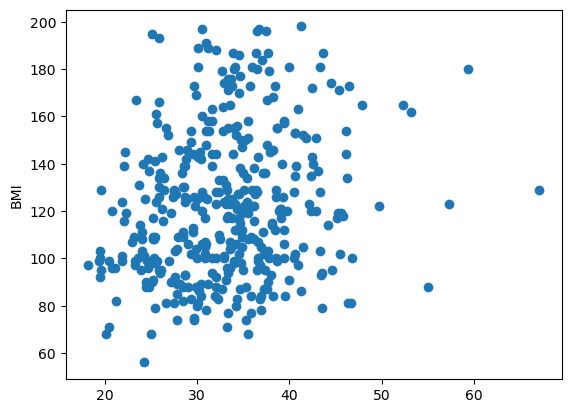

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Уровень глюкозы в крови")
plt.ylabel("BMI")
plt.show()

### Создание модели (BMI)

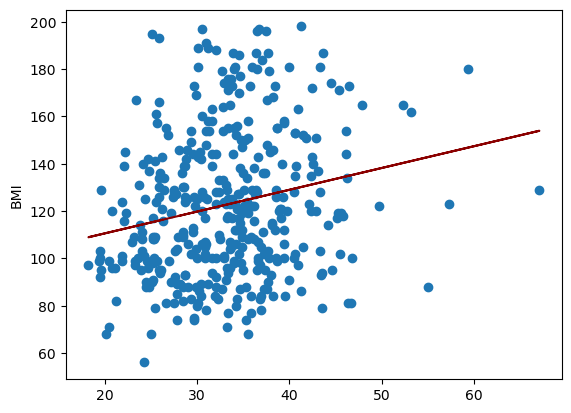

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color="darkred")
plt.ylabel("Уровень глюкозы в крови")
plt.ylabel("BMI")
plt.show()

### Просмотр данных (глюкоза/инсулин)

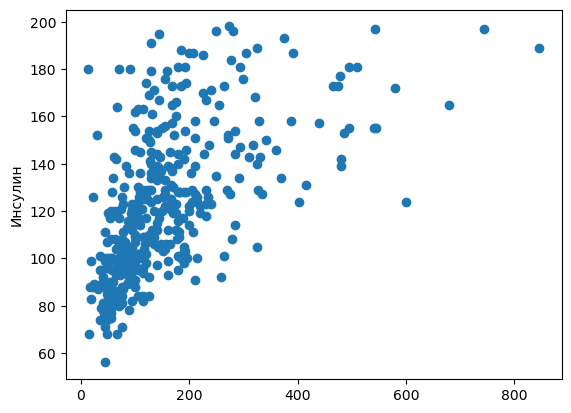

In [47]:
plt.scatter(X_in, y)
plt.ylabel("Уровень глюкозы в крови")
plt.ylabel("Инсулин")
plt.show()

### Создание модели (инсулин)

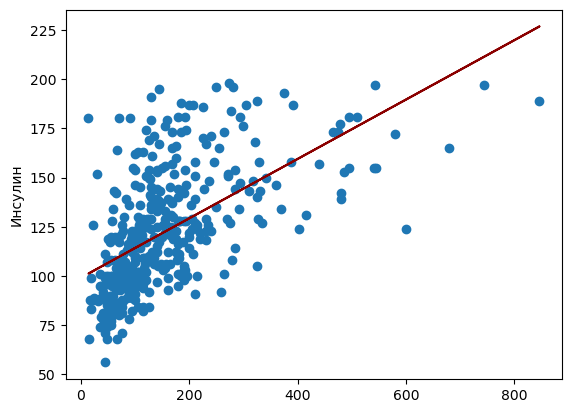

In [48]:
reg = LinearRegression()
reg.fit(X_in, y)
predictions = reg.predict(X_in)
plt.scatter(X_in, y)
plt.plot(X_in, predictions, color="darkred")
plt.ylabel("Уровень глюкозы в крови")
plt.ylabel("Инсулин")
plt.show()

### Линейная модель для множества признаков

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2024)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train).coef_

array([ 0.19530624,  0.15606803, -0.04539874,  0.12371987, -0.14996766,
        3.2493279 ,  0.36625172, 21.09327269])

In [50]:
y_pred = reg_all.predict(X_test)

### R-квадрат

In [51]:
reg_all.score(X_test, y_test)

0.39718234328738233

### RMSE/MSE

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

/Library/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


22.703142764960706

In [53]:
mean_squared_error(y_test, y_pred, squared = True)

/Library/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


515.4326914061876

### Кросвалидация

In [54]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 12, shuffle=True, random_state = 2024)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = kf)

In [55]:
print(cv_results)

[0.06730201 0.57274332 0.44976815 0.27134794 0.41337757 0.54300788
 0.28898849 0.4489935  0.48537193 0.40526747 0.53398808 0.70327803]


In [56]:
print(np.mean(cv_results), np.std(cv_results))

0.43195286422200646 0.15808890310582682


In [57]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.12341464 0.66738099]


### Гребневая регрессия

In [58]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)


[0.3971661655035953, 0.3969916477380063, 0.39331100165619415, 0.3517072976641663, 0.31292364050450117]


### Лассо регерссия

In [59]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 0.1, 1, 10, 20, 50]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)


[0.3974067662718591, 0.3992890028829087, 0.39866168991309636, 0.3116024894903642, 0.3132264549981679, 0.3070241609345419]


### Выбор признаков с помощью лассо регрессии

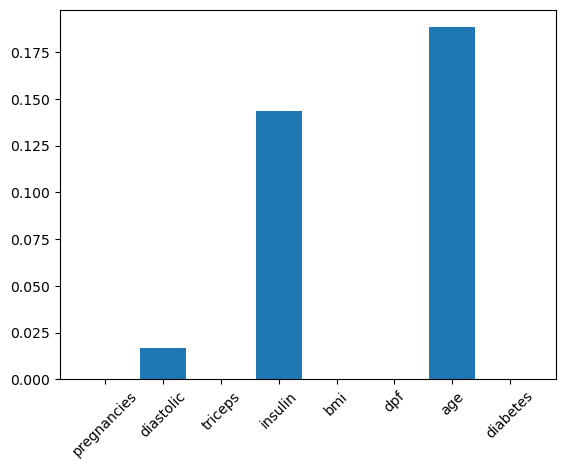

In [60]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"]
names = diabetes_df.drop("glucose", axis=1).columns
lass0 = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation = 45)
plt.show()